In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout,Bidirectional
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from tensorflow.keras.optimizers import schedules
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df=pd.read_csv(r"..\processed data\all_data_combined.csv")

# Define columns to keep
columns_to_keep = ['Current_Date','HCHO_reading', 'PRCP', 'TAVG', 'TMAX', 'TMIN', 'Population', 
                   'Population_density', 'total', 'new', 'Lockdown', 'carbonmonoxide_average', 
                   'nitrogendioxide_average', 'ozone_average','Location']

df = df[columns_to_keep]

try:
    # Convert 'Current_Date' to DateTime format
    df['Current_Date'] = pd.to_datetime(df['Current_Date'])
    print("Conversion to DateTime format successful.")
except ValueError as e:
    print(f"Error converting to DateTime format: {e}")
    
# Convert 'Current_Date' to DateTime format
df['Current_Date'] = pd.to_datetime(df['Current_Date'])
df['Year']=df['Current_Date'].dt.year
df['Month']=df['Current_Date'].dt.month
df['Day']=df['Current_Date'].dt.day
    
df = df.sort_values(by='Current_Date')
df.set_index('Current_Date', inplace=True)

print(df.info())
df.head()

Conversion to DateTime format successful.
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12782 entries, 2019-01-01 to 2023-12-31
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   HCHO_reading             12782 non-null  float64
 1   PRCP                     12782 non-null  float64
 2   TAVG                     12782 non-null  float64
 3   TMAX                     12782 non-null  float64
 4   TMIN                     12782 non-null  float64
 5   Population               12782 non-null  int64  
 6   Population_density       12782 non-null  float64
 7   total                    12782 non-null  float64
 8   new                      12782 non-null  float64
 9   Lockdown                 12782 non-null  int64  
 10  carbonmonoxide_average   12782 non-null  float64
 11  nitrogendioxide_average  12782 non-null  float64
 12  ozone_average            12782 non-null  float64
 13  Location         

,HCHO_reading,PRCP,TAVG,TMAX,TMIN,Population,Population_density,total,new,Lockdown,carbonmonoxide_average,nitrogendioxide_average,ozone_average,Location,Year,Month,Day
Current_Date,,,,,,,,,,,,,,,,,
2019-01-01,0.000019,0.22,21.79,26.15,18.60,496000,87.963538,0.0,0.0,0,0.035565,0.000007,0.113006,"Bibile, Monaragala",2019,1,1
2019-01-01,0.000044,0.00,60.00,71.00,49.00,768000,441.075121,0.0,0.0,0,0.031612,0.000012,0.112052,Nuwara Eliya Proper,2019,1,1
2019-01-01,0.000058,0.00,25.09,26.42,23.92,617000,601.775090,0.0,0.0,0,0.037301,0.000009,0.112769,Jaffna Proper,2019,1,1
2019-01-01,0.000176,0.09,21.72,26.44,18.53,1476000,761.020882,0.0,0.0,0,0.033072,0.000012,0.112873,Kandy Proper,2019,1,1
2019-01-01,0.000197,0.00,81.50,89.00,74.00,2448000,3503.649635,0.0,0.0,0,0.040408,0.000030,0.113651,Colombo Proper,2019,1,1


# Colombo Finalized

Epoch 1/200


C:\Users\janak\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.1410 - val_loss: 0.0215
Epoch 2/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0202 - val_loss: 0.0173
Epoch 3/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0189 - val_loss: 0.0174
Epoch 4/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0192 - val_loss: 0.0172
Epoch 5/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0202 - val_loss: 0.0169
Epoch 6/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0183 - val_loss: 0.0168
Epoch 7/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0183 - val_loss: 0.0168
Epoch 8/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0172 - val_loss: 0.0168
Epoch 9/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0166 - val_loss: 0.0172
Epoch 10/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0180 - val_loss: 0.0168
Epoch 11/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0184 - val_loss: 0.0169
Epoch 12/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0178 - val_lo

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0166 - val_loss: 0.0166
Epoch 138/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0166 - val_loss: 0.0170
Epoch 139/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0168 - val_loss: 0.0168
Epoch 140/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0167 - val_loss: 0.0166
Epoch 141/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0164 - val_loss: 0.0171
Epoch 142/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0153 - val_loss: 0.0171
Epoch 143/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0173 - val_loss: 0.0167
Epoch 144/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0161 - val_loss: 0.0167
Epoch 145/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0160 - val_loss: 0.0166
Epoch 146/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0150 - val_loss: 0.0170
Epoch 147/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0157 - val_loss: 0.0168
Epoch 148/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - lo

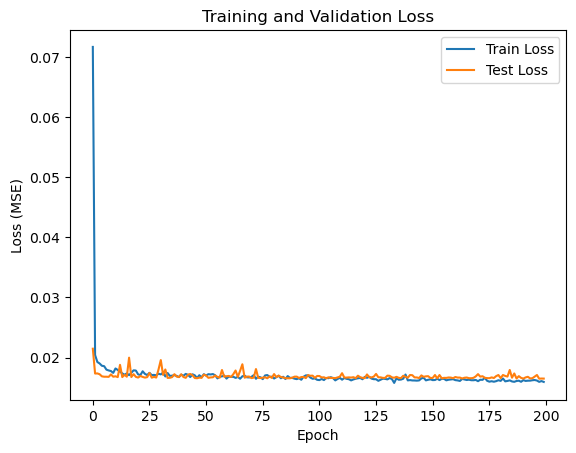

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test R^2 Score: 0.3475
Test MAE: 5.103588938396172e-05
Test MSE: 4.591818355928865e-09
Train R^2 Score: 0.415
Train MAE: 5.003299370275566e-05
Train MSE: 4.3765021956990415e-09


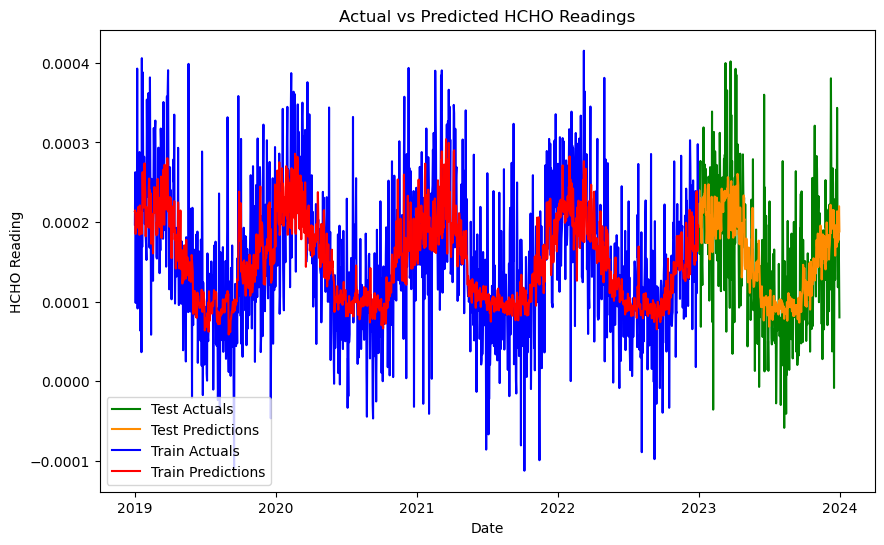

In [11]:
modeling_df = df[df['Location'] == 'Colombo Proper']


# Define input features (X) and target variable (y)
# Manual Feature selection
X_cols = ['TMAX', 'carbonmonoxide_average', 'nitrogendioxide_average', 'ozone_average','Year','Month','Day','Population', 'total']
y_col = ['HCHO_reading']

X = modeling_df[X_cols].values  # Features
y = modeling_df[y_col].values   # Target

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape input data to 3D array (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

model = Sequential([
    LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(units=100, return_sequences=True),
    Dropout(0.2),
    LSTM(units=100),
    Dropout(0.2),
    Dense(1)
]) 

# Define a learning rate schedule
learning_rate_schedule = schedules.ExponentialDecay(
    initial_learning_rate=0.001,  # Initial learning rate
    decay_steps=1000,              # Decay steps
    decay_rate=0.96,               # Decay rate
    staircase=True                 # Whether to apply decay in a staircase manner
)

# Define the optimizer with the learning rate schedule
custom_optimizer = Adam(learning_rate=learning_rate_schedule)

# Compile the model with the custom optimizer
model.compile(optimizer=custom_optimizer, loss='mse')

# Train the model and capture history
history = model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=1, validation_data=(X_test, y_test))

# Plot loss curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Predictions on test data
y_pred = model.predict(X_test)

# Predictions on training data
y_train_pred = model.predict(X_train)

# Rescale predictions and actuals
y_pred_rescaled = scaler.inverse_transform(np.concatenate((X_test.reshape(X_test.shape[0], -1)[:, :-1], y_pred), axis=1))
y_test_rescaled = scaler.inverse_transform(np.concatenate((X_test.reshape(X_test.shape[0], -1)[:, :-1], y_test.reshape(-1, 1)), axis=1))
y_train_pred_rescaled = scaler.inverse_transform(np.concatenate((X_train.reshape(X_train.shape[0], -1)[:, :-1], y_train_pred), axis=1))
y_train_rescaled = scaler.inverse_transform(np.concatenate((X_train.reshape(X_train.shape[0], -1)[:, :-1], y_train.reshape(-1, 1)), axis=1))

# Extract the HCHO readings
y_pred_hcho = y_pred_rescaled[:, -1]
y_test_hcho = y_test_rescaled[:, -1]
y_train_pred_hcho = y_train_pred_rescaled[:, -1]
y_train_hcho = y_train_rescaled[:, -1]

# Calculate R^2 score and MAE for test data
r2_test = round(r2_score(y_test_hcho, y_pred_hcho), 4)
mae_test = mean_absolute_error(y_test_hcho, y_pred_hcho)
mse_test = mean_squared_error(y_test_hcho, y_pred_hcho)
print("Test R^2 Score:", r2_test)
print("Test MAE:", mae_test)
print("Test MSE:", mse_test)

# Calculate R^2 score and MAE for training data
r2_train = round(r2_score(y_train_hcho, y_train_pred_hcho), 4)
mae_train = mean_absolute_error(y_train_hcho, y_train_pred_hcho)
mse_train = mean_squared_error(y_train_hcho, y_train_pred_hcho)
print("Train R^2 Score:", r2_train)
print("Train MAE:", mae_train)
print("Train MSE:", mse_train)

# Plot actuals vs predicted for both training and test data
plt.figure(figsize=(10, 6))
plt.plot(modeling_df.index[-len(y_test_hcho):], y_test_hcho, label='Test Actuals', color='green')
plt.plot(modeling_df.index[-len(y_pred_hcho):], y_pred_hcho, label='Test Predictions', color='darkorange')
plt.plot(modeling_df.index[:len(y_train_hcho)], y_train_hcho, label='Train Actuals', color='blue')
plt.plot(modeling_df.index[:len(y_train_pred_hcho)], y_train_pred_hcho, label='Train Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.title('Actual vs Predicted HCHO Readings')
plt.legend()
plt.show()


In [59]:
df['Location'].unique()

array(['Bibile, Monaragala', 'Nuwara Eliya Proper', 'Jaffna Proper',
       'Kandy Proper', 'Colombo Proper', 'Kurunegala Proper',
       'Deniyaya, Matara'], dtype=object)

# Monaragala

Epoch 1/100


C:\Users\janak\anaconda3\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.2049 - mean_squared_error: 0.2050 - val_loss: 0.0325 - val_mean_squared_error: 0.0313
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.0386 - val_mean_squared_error: 0.0367
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.0301 - val_mean_squared_error: 0.0295
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0270 - mean_squared_error: 0.0270 - val_loss: 0.0316 - val_mean_squared_error: 0.0329
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0269 - mean_squared_error: 0.0268 - val_loss: 0.0288 - val_mean_squared_error: 0.0297
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0271 - mean_squared_error: 0.0271 - val_loss: 0.0273 - val_mean_squared_error: 0.0276
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0271 - mean_squared_error: 0.0270 - val_loss: 0.0333 - val_mean_squa

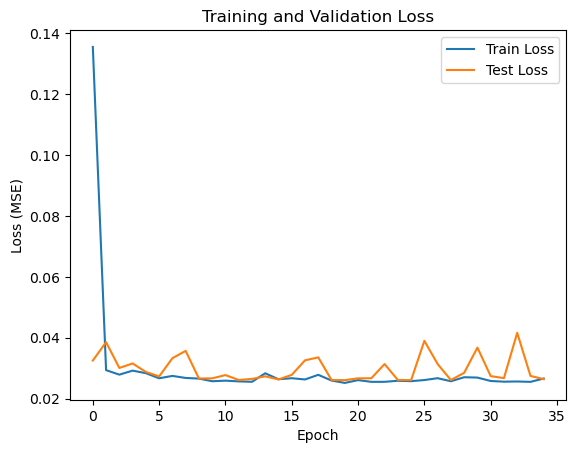

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test R^2 Score: 0.2113
Test MAE: 5.5262784834579345e-05
Test MSE: 5.0481199518578205e-09
Train R^2 Score: 0.1455
Train MAE: 5.206852237070294e-05
Train MSE: 4.486731312692952e-09


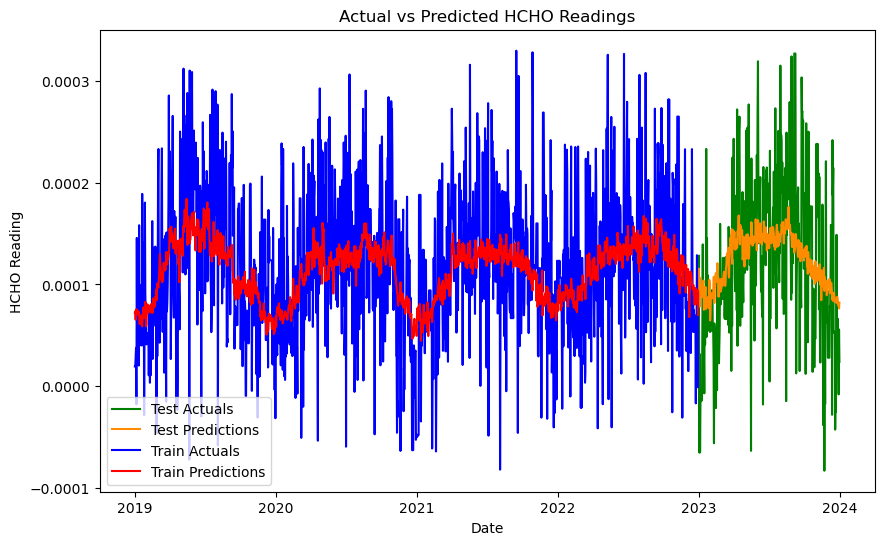

In [70]:
modeling_df = df[df['Location'] == 'Bibile, Monaragala']


# Define input features (X) and target variable (y)
# Manual Feature selection
X_cols = ['TMAX', 'carbonmonoxide_average', 'nitrogendioxide_average', 'ozone_average','Year','Month','Day','Population', 'total']
y_col = ['HCHO_reading']

X = modeling_df[X_cols].values  # Features
y = modeling_df[y_col].values   # Target

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape input data to 3D array (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the LSTM model
# model = Sequential()
# model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(Dense(1))

model = Sequential([
    Bidirectional(LSTM(100, return_sequences=True, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])),
    Bidirectional(LSTM(100, return_sequences=True, activation='relu')),
    LSTM(100, activation='relu'),
    Dense(1, activation='linear')
])


optimizer = RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

# Define the optimizer with the learning rate schedule
#custom_optimizer = Adam(learning_rate=learning_rate_schedule)

# Compile the model with the custom optimizer
#model.compile(optimizer=custom_optimizer, loss='mse')

# Train the model and capture history
#history = model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=1, validation_data=(X_test, y_test))

# Plot loss curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Predictions on test data
y_pred = model.predict(X_test)

# Predictions on training data
y_train_pred = model.predict(X_train)

# Rescale predictions and actuals
y_pred_rescaled = scaler.inverse_transform(np.concatenate((X_test.reshape(X_test.shape[0], -1)[:, :-1], y_pred), axis=1))
y_test_rescaled = scaler.inverse_transform(np.concatenate((X_test.reshape(X_test.shape[0], -1)[:, :-1], y_test.reshape(-1, 1)), axis=1))
y_train_pred_rescaled = scaler.inverse_transform(np.concatenate((X_train.reshape(X_train.shape[0], -1)[:, :-1], y_train_pred), axis=1))
y_train_rescaled = scaler.inverse_transform(np.concatenate((X_train.reshape(X_train.shape[0], -1)[:, :-1], y_train.reshape(-1, 1)), axis=1))

# Extract the HCHO readings
y_pred_hcho = y_pred_rescaled[:, -1]
y_test_hcho = y_test_rescaled[:, -1]
y_train_pred_hcho = y_train_pred_rescaled[:, -1]
y_train_hcho = y_train_rescaled[:, -1]

# Calculate R^2 score and MAE for test data
r2_test = round(r2_score(y_test_hcho, y_pred_hcho), 4)
mae_test = mean_absolute_error(y_test_hcho, y_pred_hcho)
mse_test = mean_squared_error(y_test_hcho, y_pred_hcho)
print("Test R^2 Score:", r2_test)
print("Test MAE:", mae_test)
print("Test MSE:", mse_test)

# Calculate R^2 score and MAE for training data
r2_train = round(r2_score(y_train_hcho, y_train_pred_hcho), 4)
mae_train = mean_absolute_error(y_train_hcho, y_train_pred_hcho)
mse_train = mean_squared_error(y_train_hcho, y_train_pred_hcho)
print("Train R^2 Score:", r2_train)
print("Train MAE:", mae_train)
print("Train MSE:", mse_train)

# Plot actuals vs predicted for both training and test data
plt.figure(figsize=(10, 6))
plt.plot(modeling_df.index[-len(y_test_hcho):], y_test_hcho, label='Test Actuals', color='green')
plt.plot(modeling_df.index[-len(y_pred_hcho):], y_pred_hcho, label='Test Predictions', color='darkorange')
plt.plot(modeling_df.index[:len(y_train_hcho)], y_train_hcho, label='Train Actuals', color='blue')
plt.plot(modeling_df.index[:len(y_train_pred_hcho)], y_train_pred_hcho, label='Train Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.title('Actual vs Predicted HCHO Readings')
plt.legend()
plt.show()


# Matara finalized

Epoch 1/100


C:\Users\janak\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0751 - mean_squared_error: 0.0751 - val_loss: 0.0236 - val_mean_squared_error: 0.0211
Epoch 2/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0283 - mean_squared_error: 0.0283 - val_loss: 0.0368 - val_mean_squared_error: 0.0307
Epoch 3/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.0318 - val_mean_squared_error: 0.0267
Epoch 4/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0286 - mean_squared_error: 0.0286 - val_loss: 0.0233 - val_mean_squared_error: 0.0208
Epoch 5/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0271 - mean_squared_error: 0.0271 - val_loss: 0.0387 - val_mean_squared_error: 0.0331
Epoch 6/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0289 - mean_squared_error: 0.0289 - val_loss: 0.0313 - val_mean_squared_error: 0.0267
Epoch 7/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0283 - mean_squared_error: 0.0283 - val_loss: 0.0243 

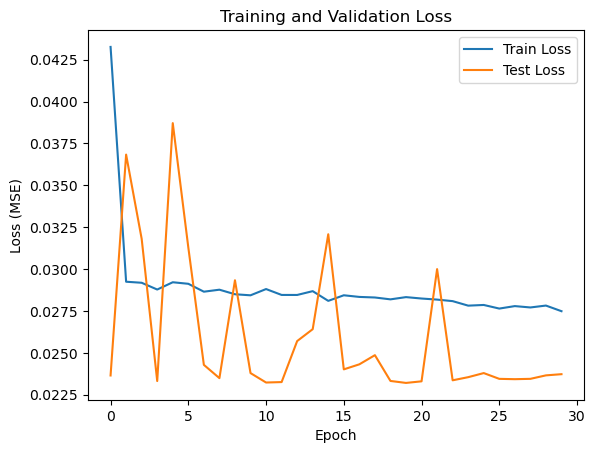

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test R^2 Score: 0.0799
Test MAE: 5.062482388805618e-05
Test MSE: 4.217555101171146e-09
Train R^2 Score: 0.0792
Train MAE: 4.8112599762638584e-05
Train MSE: 3.949982288747572e-09


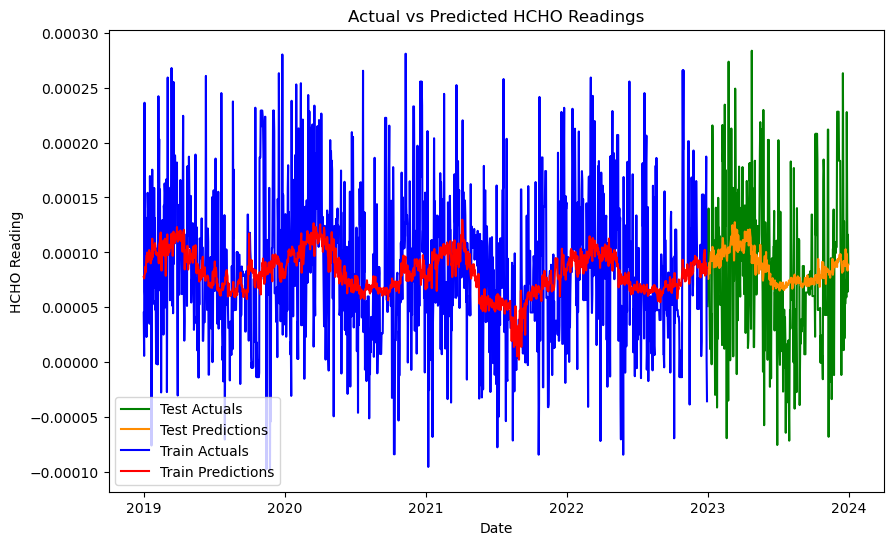

In [129]:
modeling_df = df[df['Location'] == 'Deniyaya, Matara']


# Define input features (X) and target variable (y)
# Manual Feature selection
X_cols = ['TMAX', 'carbonmonoxide_average','Year','Month','Day','new']
y_col = ['HCHO_reading']

X = modeling_df[X_cols].values  # Features
y = modeling_df[y_col].values   # Target

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape input data to 3D array (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# # Define the LSTM model
model = Sequential()
model.add(LSTM(60,  activation='relu',input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

# model = Sequential([
#     Bidirectional(LSTM(100, return_sequences=True, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])),
#     Dropout(0.2),
#     Bidirectional(LSTM(100, return_sequences=True, activation='relu')),
#     Dropout(0.2),
#     LSTM(100, activation='relu'),
#     Dense(1, activation='linear')
# ])


optimizer = RMSprop(learning_rate=0.002)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.1, callbacks=[early_stopping])

# Define the optimizer with the learning rate schedule
#custom_optimizer = Adam(learning_rate=learning_rate_schedule)

# Compile the model with the custom optimizer
#model.compile(optimizer=custom_optimizer, loss='mse')

# Train the model and capture history
#history = model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=1, validation_data=(X_test, y_test))

# Plot loss curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Predictions on test data
y_pred = model.predict(X_test)

# Predictions on training data
y_train_pred = model.predict(X_train)

# Rescale predictions and actuals
y_pred_rescaled = scaler.inverse_transform(np.concatenate((X_test.reshape(X_test.shape[0], -1)[:, :-1], y_pred), axis=1))
y_test_rescaled = scaler.inverse_transform(np.concatenate((X_test.reshape(X_test.shape[0], -1)[:, :-1], y_test.reshape(-1, 1)), axis=1))
y_train_pred_rescaled = scaler.inverse_transform(np.concatenate((X_train.reshape(X_train.shape[0], -1)[:, :-1], y_train_pred), axis=1))
y_train_rescaled = scaler.inverse_transform(np.concatenate((X_train.reshape(X_train.shape[0], -1)[:, :-1], y_train.reshape(-1, 1)), axis=1))

# Extract the HCHO readings
y_pred_hcho = y_pred_rescaled[:, -1]
y_test_hcho = y_test_rescaled[:, -1]
y_train_pred_hcho = y_train_pred_rescaled[:, -1]
y_train_hcho = y_train_rescaled[:, -1]

# Calculate R^2 score and MAE for test data
r2_test = round(r2_score(y_test_hcho, y_pred_hcho), 4)
mae_test = mean_absolute_error(y_test_hcho, y_pred_hcho)
mse_test = mean_squared_error(y_test_hcho, y_pred_hcho)
print("Test R^2 Score:", r2_test)
print("Test MAE:", mae_test)
print("Test MSE:", mse_test)

# Calculate R^2 score and MAE for training data
r2_train = round(r2_score(y_train_hcho, y_train_pred_hcho), 4)
mae_train = mean_absolute_error(y_train_hcho, y_train_pred_hcho)
mse_train = mean_squared_error(y_train_hcho, y_train_pred_hcho)
print("Train R^2 Score:", r2_train)
print("Train MAE:", mae_train)
print("Train MSE:", mse_train)

# Plot actuals vs predicted for both training and test data
plt.figure(figsize=(10, 6))
plt.plot(modeling_df.index[-len(y_test_hcho):], y_test_hcho, label='Test Actuals', color='green')
plt.plot(modeling_df.index[-len(y_pred_hcho):], y_pred_hcho, label='Test Predictions', color='darkorange')
plt.plot(modeling_df.index[:len(y_train_hcho)], y_train_hcho, label='Train Actuals', color='blue')
plt.plot(modeling_df.index[:len(y_train_pred_hcho)], y_train_pred_hcho, label='Train Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.title('Actual vs Predicted HCHO Readings')
plt.legend()
plt.show()


In [ ]:
# model = Sequential([
#     Bidirectional(LSTM(100, return_sequences=True, activation='tanh'), input_shape=(X_train.shape[1], X_train.shape[2])),
#     Dropout(0.5),
#     Bidirectional(LSTM(100, return_sequences=True, activation='tanh')),
#     Dropout(0.5),
#     LSTM(100, activation='tanh'),
#     Dense(1, activation='linear')
# ])

# Kurunegala Proper

Epoch 1/100


C:\Users\janak\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.2828 - val_loss: 0.2565
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2615 - val_loss: 0.2333
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2374 - val_loss: 0.1955
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1853 - val_loss: 0.1294
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1155 - val_loss: 0.0470
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0454 - val_loss: 0.0330
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0378 - val_loss: 0.0321
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0363 - val_loss: 0.0307
Epoch 9/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0344 - val_loss: 0.0305
Epoch 10/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0326 - val_loss: 0.0296
Epoch 11/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0331 - val_loss: 0.0290
Epoch 12/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0347 - val_l

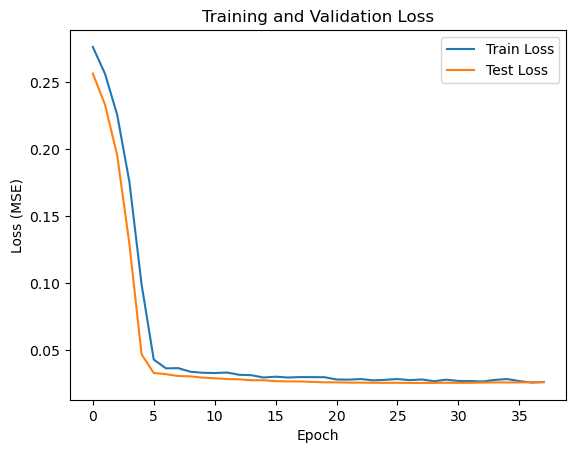

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step
Test R^2 Score: 0.1474
Test MAE: 5.03700446144344e-05
Test MSE: 4.141168959240851e-09
Train R^2 Score: 0.1484
Train MAE: 5.032909731615379e-05
Train MSE: 4.218056223047739e-09


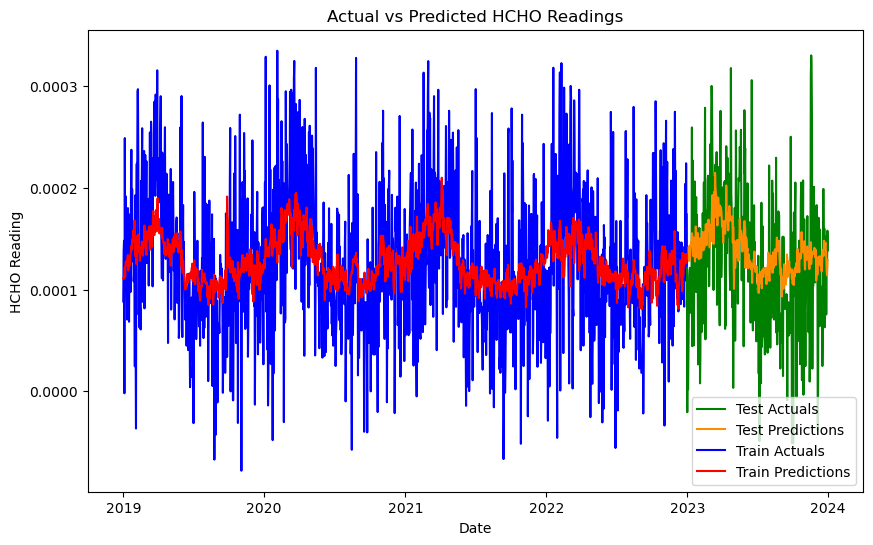

In [155]:
modeling_df = df[df['Location'] == 'Kurunegala Proper']


# Define input features (X) and target variable (y)
# Manual Feature selection
X_cols = ['TMAX', 'carbonmonoxide_average', 'nitrogendioxide_average', 'ozone_average','Year','Month','Day', 'total']
y_col = ['HCHO_reading']

X = modeling_df[X_cols].values  # Features
y = modeling_df[y_col].values   # Target

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape input data to 3D array (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# # Define the LSTM model
# model = Sequential()
# model.add(LSTM(400, activation='relu',return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(Dropout(0.5))
# model.add(LSTM(400, activation='relu'))
# Dropout(0.5)
# model.add(Dense(1))

model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(units=60, return_sequences=True),
    Dropout(0.2),# Add dropout layer with a dropout rate of 0.2
    LSTM(units=60, return_sequences=True),
    Dropout(0.2),# Add dropout layer with a dropout rate of 0.2
    LSTM(units=50),
    Dropout(0.2),
    Dense(1)
]) 


# Define the optimizer with the learning rate schedule
custom_optimizer = Adam(learning_rate=learning_rate_schedule)

# Compile the model with the custom optimizer
model.compile(optimizer=custom_optimizer, loss='mse')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.5, callbacks=[early_stopping])

# Define the optimizer with the learning rate schedule
#custom_optimizer = Adam(learning_rate=learning_rate_schedule)

# Compile the model with the custom optimizer
#model.compile(optimizer=custom_optimizer, loss='mse')

# Train the model and capture history
#history = model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=1, validation_data=(X_test, y_test))

# Plot loss curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Predictions on test data
y_pred = model.predict(X_test)

# Predictions on training data
y_train_pred = model.predict(X_train)

# Rescale predictions and actuals
y_pred_rescaled = scaler.inverse_transform(np.concatenate((X_test.reshape(X_test.shape[0], -1)[:, :-1], y_pred), axis=1))
y_test_rescaled = scaler.inverse_transform(np.concatenate((X_test.reshape(X_test.shape[0], -1)[:, :-1], y_test.reshape(-1, 1)), axis=1))
y_train_pred_rescaled = scaler.inverse_transform(np.concatenate((X_train.reshape(X_train.shape[0], -1)[:, :-1], y_train_pred), axis=1))
y_train_rescaled = scaler.inverse_transform(np.concatenate((X_train.reshape(X_train.shape[0], -1)[:, :-1], y_train.reshape(-1, 1)), axis=1))

# Extract the HCHO readings
y_pred_hcho = y_pred_rescaled[:, -1]
y_test_hcho = y_test_rescaled[:, -1]
y_train_pred_hcho = y_train_pred_rescaled[:, -1]
y_train_hcho = y_train_rescaled[:, -1]

# Calculate R^2 score and MAE for test data
r2_test = round(r2_score(y_test_hcho, y_pred_hcho), 4)
mae_test = mean_absolute_error(y_test_hcho, y_pred_hcho)
mse_test = mean_squared_error(y_test_hcho, y_pred_hcho)
print("Test R^2 Score:", r2_test)
print("Test MAE:", mae_test)
print("Test MSE:", mse_test)

# Calculate R^2 score and MAE for training data
r2_train = round(r2_score(y_train_hcho, y_train_pred_hcho), 4)
mae_train = mean_absolute_error(y_train_hcho, y_train_pred_hcho)
mse_train = mean_squared_error(y_train_hcho, y_train_pred_hcho)
print("Train R^2 Score:", r2_train)
print("Train MAE:", mae_train)
print("Train MSE:", mse_train)

# Plot actuals vs predicted for both training and test data
plt.figure(figsize=(10, 6))
plt.plot(modeling_df.index[-len(y_test_hcho):], y_test_hcho, label='Test Actuals', color='green')
plt.plot(modeling_df.index[-len(y_pred_hcho):], y_pred_hcho, label='Test Predictions', color='darkorange')
plt.plot(modeling_df.index[:len(y_train_hcho)], y_train_hcho, label='Train Actuals', color='blue')
plt.plot(modeling_df.index[:len(y_train_pred_hcho)], y_train_pred_hcho, label='Train Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.title('Actual vs Predicted HCHO Readings')
plt.legend()
plt.show()


# Kandy Proper

Epoch 1/100


C:\Users\janak\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.2425 - val_loss: 0.0470
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0423 - val_loss: 0.0326
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0374 - val_loss: 0.0341
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0373 - val_loss: 0.0323
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0389 - val_loss: 0.0320
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0384 - val_loss: 0.0320
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0367 - val_loss: 0.0318
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0397 - val_loss: 0.0344
Epoch 9/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0373 - val_loss: 0.0317
Epoch 10/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0349 - val_loss: 0.0322
Epoch 11/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0371 - val_loss: 0.0350
Epoch 12/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0350 - val_l

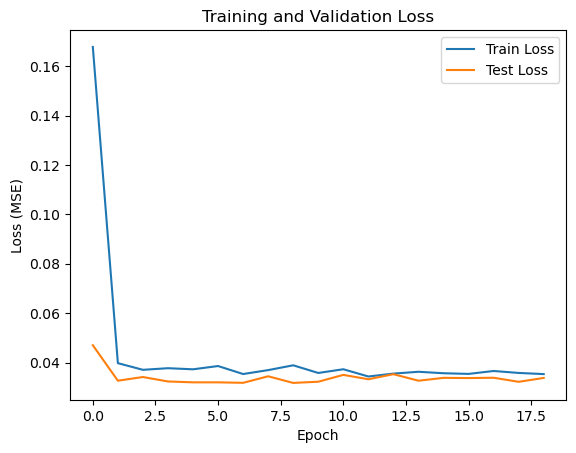

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test R^2 Score: 0.0444
Test MAE: 5.195908495882152e-05
Test MSE: 4.0363384006801435e-09
Train R^2 Score: 0.0902
Train MAE: 5.219741827607452e-05
Train MSE: 4.386582445451774e-09


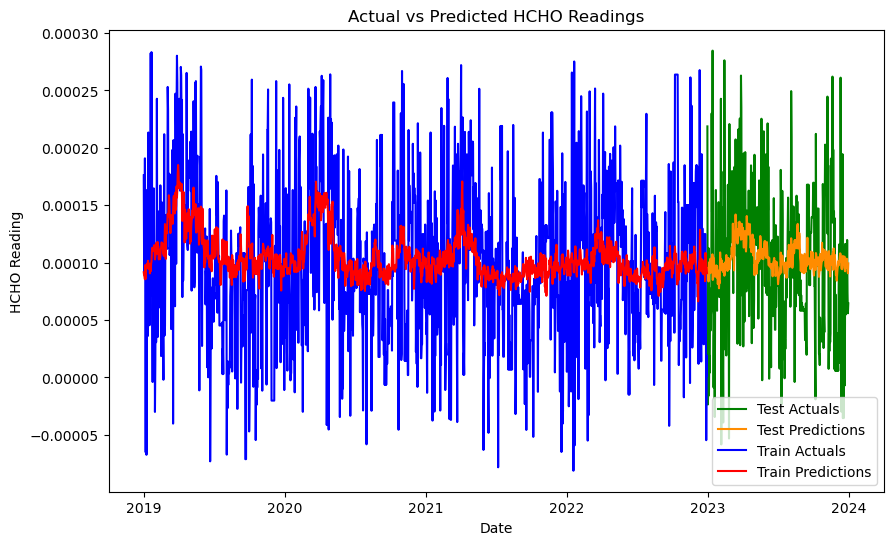

In [11]:
modeling_df = df[df['Location'] == 'Kandy Proper']


# Define input features (X) and target variable (y)
# Manual Feature selection
X_cols = ['TMAX', 'carbonmonoxide_average', 'nitrogendioxide_average','ozone_average']
y_col = ['HCHO_reading']

X = modeling_df[X_cols].values  # Features
y = modeling_df[y_col].values   # Target

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape input data to 3D array (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the LSTM model
model = Sequential()
# model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
# # model.add(Dropout(0.5))
# # model.add(LSTM(400, activation='relu'))
# # Dropout(0.5)
# model.add(Dense(1))

model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(units=60, return_sequences=True),
    Dropout(0.2),
    LSTM(units=60, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(1)
]) 

# Define a learning rate schedule
learning_rate_schedule = schedules.ExponentialDecay(
    initial_learning_rate=0.001,  # Initial learning rate
    decay_steps=1000,              # Decay steps
    decay_rate=0.96,               # Decay rate
    staircase=True                 # Whether to apply decay in a staircase manner
)

# Define the optimizer with the learning rate schedule
custom_optimizer = Adam(learning_rate=learning_rate_schedule)

# Compile the model with the custom optimizer
model.compile(optimizer=custom_optimizer, loss='mse')


# # Define the optimizer with the learning rate schedule
# custom_optimizer = Adam(learning_rate=learning_rate_schedule)

# # Compile the model with the custom optimizer
# model.compile(optimizer=custom_optimizer, loss='mse')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.5, callbacks=[early_stopping])

# Define the optimizer with the learning rate schedule
#custom_optimizer = Adam(learning_rate=learning_rate_schedule)

# Compile the model with the custom optimizer
#model.compile(optimizer=custom_optimizer, loss='mse')

# Train the model and capture history
#history = model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=1, validation_data=(X_test, y_test))

# Plot loss curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Predictions on test data
y_pred = model.predict(X_test)

# Predictions on training data
y_train_pred = model.predict(X_train)

# Rescale predictions and actuals
y_pred_rescaled = scaler.inverse_transform(np.concatenate((X_test.reshape(X_test.shape[0], -1)[:, :-1], y_pred), axis=1))
y_test_rescaled = scaler.inverse_transform(np.concatenate((X_test.reshape(X_test.shape[0], -1)[:, :-1], y_test.reshape(-1, 1)), axis=1))
y_train_pred_rescaled = scaler.inverse_transform(np.concatenate((X_train.reshape(X_train.shape[0], -1)[:, :-1], y_train_pred), axis=1))
y_train_rescaled = scaler.inverse_transform(np.concatenate((X_train.reshape(X_train.shape[0], -1)[:, :-1], y_train.reshape(-1, 1)), axis=1))

# Extract the HCHO readings
y_pred_hcho = y_pred_rescaled[:, -1]
y_test_hcho = y_test_rescaled[:, -1]
y_train_pred_hcho = y_train_pred_rescaled[:, -1]
y_train_hcho = y_train_rescaled[:, -1]

# Calculate R^2 score and MAE for test data
r2_test = round(r2_score(y_test_hcho, y_pred_hcho), 4)
mae_test = mean_absolute_error(y_test_hcho, y_pred_hcho)
mse_test = mean_squared_error(y_test_hcho, y_pred_hcho)
print("Test R^2 Score:", r2_test)
print("Test MAE:", mae_test)
print("Test MSE:", mse_test)

# Calculate R^2 score and MAE for training data
r2_train = round(r2_score(y_train_hcho, y_train_pred_hcho), 4)
mae_train = mean_absolute_error(y_train_hcho, y_train_pred_hcho)
mse_train = mean_squared_error(y_train_hcho, y_train_pred_hcho)
print("Train R^2 Score:", r2_train)
print("Train MAE:", mae_train)
print("Train MSE:", mse_train)

# Plot actuals vs predicted for both training and test data
plt.figure(figsize=(10, 6))
plt.plot(modeling_df.index[-len(y_test_hcho):], y_test_hcho, label='Test Actuals', color='green')
plt.plot(modeling_df.index[-len(y_pred_hcho):], y_pred_hcho, label='Test Predictions', color='darkorange')
plt.plot(modeling_df.index[:len(y_train_hcho)], y_train_hcho, label='Train Actuals', color='blue')
plt.plot(modeling_df.index[:len(y_train_pred_hcho)], y_train_pred_hcho, label='Train Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.title('Actual vs Predicted HCHO Readings')
plt.legend()
plt.show()


# Jaffna

C:\Users\janak\anaconda3\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - loss: 0.1644 - val_loss: 0.0299
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0238 - val_loss: 0.0297
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0239 - val_loss: 0.0333
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0216 - val_loss: 0.0309
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0227 - val_loss: 0.0301
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0205 - val_loss: 0.0308
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0218 - val_loss: 0.0341
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0229 - val_loss: 0.0300
Epoch 9/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0210 - val_loss: 0.0371
Epoch 10/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0220 - val_loss: 0.0299
Epoch 11/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0206 - val_loss: 0.0298
Epoch 12/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 

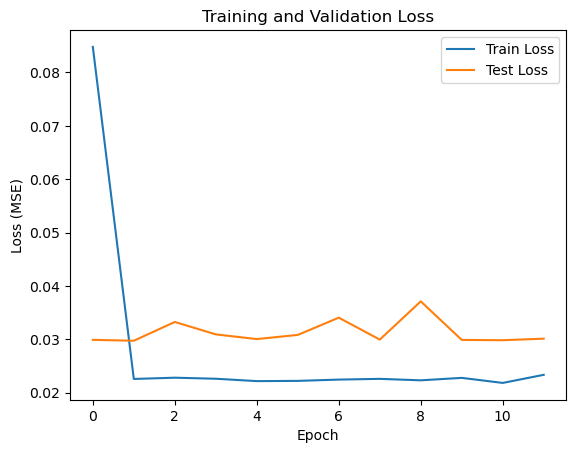

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test R^2 Score: 0.034
Test MAE: 4.780190025586932e-05
Test MSE: 3.532129420042611e-09
Train R^2 Score: 0.0742
Train MAE: 4.719064734101192e-05
Train MSE: 3.827997270118291e-09


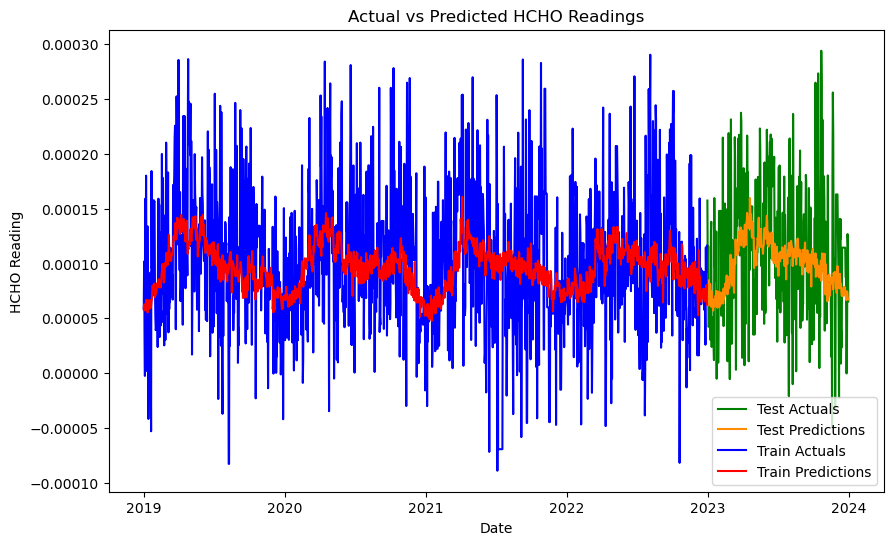

In [17]:
modeling_df = df[df['Location'] == 'Jaffna Proper']


# Define input features (X) and target variable (y)
# Manual Feature selection
X_cols = ['TMAX', 'carbonmonoxide_average', 'nitrogendioxide_average','ozone_average']
y_col = ['HCHO_reading']

X = modeling_df[X_cols].values  # Features
y = modeling_df[y_col].values   # Target

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape input data to 3D array (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the LSTM model
model = Sequential()
# model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
# # model.add(Dropout(0.5))
# # model.add(LSTM(400, activation='relu'))
# # Dropout(0.5)
# model.add(Dense(1))

model = Sequential([
    Bidirectional(LSTM(units=100, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    Bidirectional(LSTM(units=100, return_sequences=True)),
    Bidirectional(LSTM(units=50)),  
    Dense(units=1)
])

# Define a learning rate schedule
learning_rate_schedule = schedules.ExponentialDecay(
    initial_learning_rate=0.001,  # Initial learning rate
    decay_steps=1000,              # Decay steps
    decay_rate=0.96,               # Decay rate
    staircase=True                 # Whether to apply decay in a staircase manner
)

# Define the optimizer with the learning rate schedule
custom_optimizer = Adam(learning_rate=learning_rate_schedule)

# Compile the model with the custom optimizer
model.compile(optimizer=custom_optimizer, loss='mse')


# # Define the optimizer with the learning rate schedule
# custom_optimizer = Adam(learning_rate=learning_rate_schedule)

# # Compile the model with the custom optimizer
# model.compile(optimizer=custom_optimizer, loss='mse')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.5, callbacks=[early_stopping])

# Define the optimizer with the learning rate schedule
#custom_optimizer = Adam(learning_rate=learning_rate_schedule)

# Compile the model with the custom optimizer
#model.compile(optimizer=custom_optimizer, loss='mse')

# Train the model and capture history
#history = model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=1, validation_data=(X_test, y_test))

# Plot loss curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Predictions on test data
y_pred = model.predict(X_test)

# Predictions on training data
y_train_pred = model.predict(X_train)

# Rescale predictions and actuals
y_pred_rescaled = scaler.inverse_transform(np.concatenate((X_test.reshape(X_test.shape[0], -1)[:, :-1], y_pred), axis=1))
y_test_rescaled = scaler.inverse_transform(np.concatenate((X_test.reshape(X_test.shape[0], -1)[:, :-1], y_test.reshape(-1, 1)), axis=1))
y_train_pred_rescaled = scaler.inverse_transform(np.concatenate((X_train.reshape(X_train.shape[0], -1)[:, :-1], y_train_pred), axis=1))
y_train_rescaled = scaler.inverse_transform(np.concatenate((X_train.reshape(X_train.shape[0], -1)[:, :-1], y_train.reshape(-1, 1)), axis=1))

# Extract the HCHO readings
y_pred_hcho = y_pred_rescaled[:, -1]
y_test_hcho = y_test_rescaled[:, -1]
y_train_pred_hcho = y_train_pred_rescaled[:, -1]
y_train_hcho = y_train_rescaled[:, -1]

# Calculate R^2 score and MAE for test data
r2_test = round(r2_score(y_test_hcho, y_pred_hcho), 4)
mae_test = mean_absolute_error(y_test_hcho, y_pred_hcho)
mse_test = mean_squared_error(y_test_hcho, y_pred_hcho)
print("Test R^2 Score:", r2_test)
print("Test MAE:", mae_test)
print("Test MSE:", mse_test)

# Calculate R^2 score and MAE for training data
r2_train = round(r2_score(y_train_hcho, y_train_pred_hcho), 4)
mae_train = mean_absolute_error(y_train_hcho, y_train_pred_hcho)
mse_train = mean_squared_error(y_train_hcho, y_train_pred_hcho)
print("Train R^2 Score:", r2_train)
print("Train MAE:", mae_train)
print("Train MSE:", mse_train)

# Plot actuals vs predicted for both training and test data
plt.figure(figsize=(10, 6))
plt.plot(modeling_df.index[-len(y_test_hcho):], y_test_hcho, label='Test Actuals', color='green')
plt.plot(modeling_df.index[-len(y_pred_hcho):], y_pred_hcho, label='Test Predictions', color='darkorange')
plt.plot(modeling_df.index[:len(y_train_hcho)], y_train_hcho, label='Train Actuals', color='blue')
plt.plot(modeling_df.index[:len(y_train_pred_hcho)], y_train_pred_hcho, label='Train Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.title('Actual vs Predicted HCHO Readings')
plt.legend()
plt.show()


# Nuwara Eliya Proper

C:\Users\janak\anaconda3\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.1961 - val_loss: 0.0459
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0369 - val_loss: 0.0285
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0285 - val_loss: 0.0272
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0288 - val_loss: 0.0273
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0287 - val_loss: 0.0273
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0287 - val_loss: 0.0271
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0283 - val_loss: 0.0271
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0265 - val_loss: 0.0275
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0290 - val_loss: 0.0271
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0270 - val_loss: 0.0274
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0276 - val_loss: 0.0279
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/ste

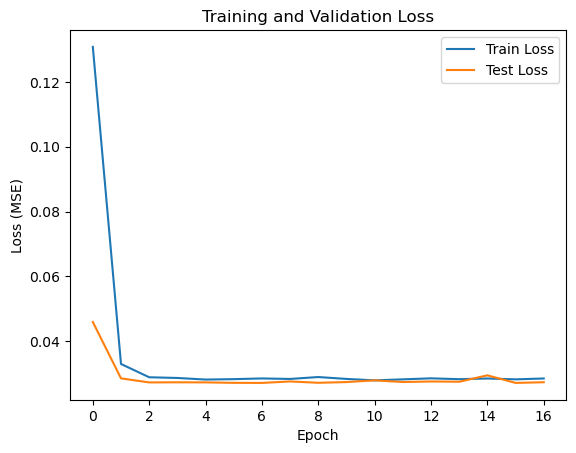

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step 
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test R^2 Score: -0.0572
Test MAE: 5.071177223209523e-05
Test MSE: 4.428607422211924e-09
Train R^2 Score: 0.0501
Train MAE: 4.981922114805355e-05
Train MSE: 4.178934772671905e-09


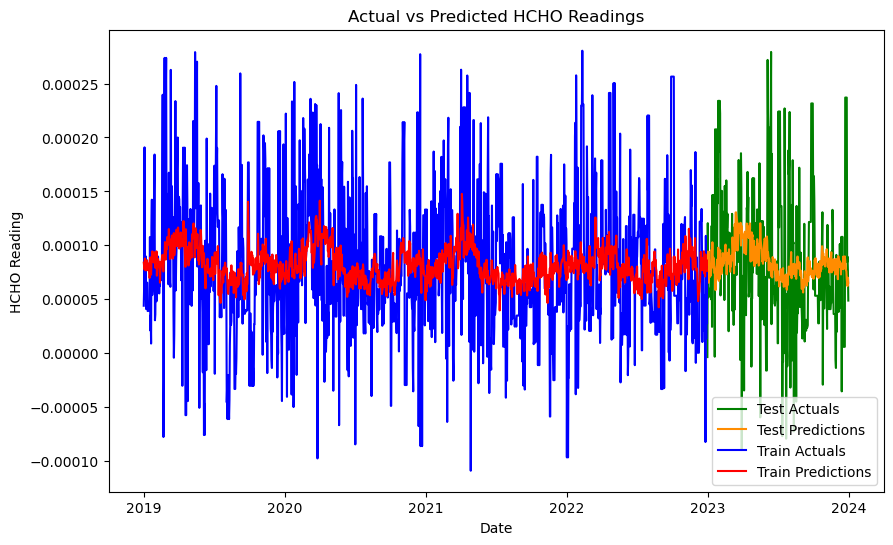

In [23]:
modeling_df = df[df['Location'] == 'Nuwara Eliya Proper']


# Define input features (X) and target variable (y)
# Manual Feature selection
X_cols = ['TMAX', 'carbonmonoxide_average', 'nitrogendioxide_average','ozone_average']
y_col = ['HCHO_reading']

X = modeling_df[X_cols].values  # Features
y = modeling_df[y_col].values   # Target

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape input data to 3D array (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# # Define the LSTM model
# model = Sequential()
# model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
# # model.add(Dropout(0.5))
# # model.add(LSTM(400, activation='relu'))
# # Dropout(0.5)
# model.add(Dense(1))

model = Sequential([
    Bidirectional(LSTM(units=100, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    Bidirectional(LSTM(units=100, return_sequences=True)),
    Bidirectional(LSTM(units=100)),  
    Dense(units=1)
])

# Define a learning rate schedule
learning_rate_schedule = schedules.ExponentialDecay(
    initial_learning_rate=0.001,  # Initial learning rate
    decay_steps=1000,              # Decay steps
    decay_rate=0.96,               # Decay rate
    staircase=True                 # Whether to apply decay in a staircase manner
)

# Define the optimizer with the learning rate schedule
custom_optimizer = Adam(learning_rate=learning_rate_schedule)

# Compile the model with the custom optimizer
model.compile(optimizer=custom_optimizer, loss='mse')


# # Define the optimizer with the learning rate schedule
# custom_optimizer = Adam(learning_rate=learning_rate_schedule)

# # Compile the model with the custom optimizer
# model.compile(optimizer=custom_optimizer, loss='mse')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.5, callbacks=[early_stopping])

# Define the optimizer with the learning rate schedule
#custom_optimizer = Adam(learning_rate=learning_rate_schedule)

# Compile the model with the custom optimizer
#model.compile(optimizer=custom_optimizer, loss='mse')

# Train the model and capture history
#history = model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=1, validation_data=(X_test, y_test))

# Plot loss curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Predictions on test data
y_pred = model.predict(X_test)

# Predictions on training data
y_train_pred = model.predict(X_train)

# Rescale predictions and actuals
y_pred_rescaled = scaler.inverse_transform(np.concatenate((X_test.reshape(X_test.shape[0], -1)[:, :-1], y_pred), axis=1))
y_test_rescaled = scaler.inverse_transform(np.concatenate((X_test.reshape(X_test.shape[0], -1)[:, :-1], y_test.reshape(-1, 1)), axis=1))
y_train_pred_rescaled = scaler.inverse_transform(np.concatenate((X_train.reshape(X_train.shape[0], -1)[:, :-1], y_train_pred), axis=1))
y_train_rescaled = scaler.inverse_transform(np.concatenate((X_train.reshape(X_train.shape[0], -1)[:, :-1], y_train.reshape(-1, 1)), axis=1))

# Extract the HCHO readings
y_pred_hcho = y_pred_rescaled[:, -1]
y_test_hcho = y_test_rescaled[:, -1]
y_train_pred_hcho = y_train_pred_rescaled[:, -1]
y_train_hcho = y_train_rescaled[:, -1]

# Calculate R^2 score and MAE for test data
r2_test = round(r2_score(y_test_hcho, y_pred_hcho), 4)
mae_test = mean_absolute_error(y_test_hcho, y_pred_hcho)
mse_test = mean_squared_error(y_test_hcho, y_pred_hcho)
print("Test R^2 Score:", r2_test)
print("Test MAE:", mae_test)
print("Test MSE:", mse_test)

# Calculate R^2 score and MAE for training data
r2_train = round(r2_score(y_train_hcho, y_train_pred_hcho), 4)
mae_train = mean_absolute_error(y_train_hcho, y_train_pred_hcho)
mse_train = mean_squared_error(y_train_hcho, y_train_pred_hcho)
print("Train R^2 Score:", r2_train)
print("Train MAE:", mae_train)
print("Train MSE:", mse_train)

# Plot actuals vs predicted for both training and test data
plt.figure(figsize=(10, 6))
plt.plot(modeling_df.index[-len(y_test_hcho):], y_test_hcho, label='Test Actuals', color='green')
plt.plot(modeling_df.index[-len(y_pred_hcho):], y_pred_hcho, label='Test Predictions', color='darkorange')
plt.plot(modeling_df.index[:len(y_train_hcho)], y_train_hcho, label='Train Actuals', color='blue')
plt.plot(modeling_df.index[:len(y_train_pred_hcho)], y_train_pred_hcho, label='Train Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.title('Actual vs Predicted HCHO Readings')
plt.legend()
plt.show()
